# Hotel Reviews Data in Europe Analysis

## Data Cleaning and Processing

### Extracting Data

In [1]:
# Import the libarires we need for data cleaning and processing
import pandas as pd
from pandas import DataFrame as df

In [2]:
# Read the "Hotel Reviews Data in Europe" download from https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe
rawdata = pd.read_csv('Hotel_Reviews.csv', )

# Drop records if selected Columns contains empty variable. Those selected columns are the basic information we agree must obtain data
rawdata2= rawdata.dropna(subset=['Hotel_Address', 'Reviewer_Score','Average_Score'])

dfa= pd.DataFrame(rawdata2)

# Reset the dataset in case certained rows were removed based on the condition with unsequenced index
dfa=dfa.reset_index()

dfa.head()

,index,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:

# dfa['Year'] = pd.DatetimeIndex(dfa['Review_Date']).year

# YearCount = dfa['Year'].value_counts()
# print(YearCount)

### Create Country Information

We will then compile a country list to identify how many countries of the hotel are contained in this dataset. With the consideration of some countries might have more than 1 character (eg. United Kingdom). Last two characters are extracted from the Hotel Address for verification. 

In [4]:
# Preparation 'Country' - Do the last word split is out? ANS: NO.

Location= dfa['Hotel_Address'].str.split()

CountryName=[]
for i in Location:
    CountryName.append(i[-2:])
    
df_CountryName=pd.DataFrame(CountryName)

df_CountryName = df_CountryName.drop_duplicates()

df_CountryName.head()

,0,1
0,Amsterdam,Netherlands
405,United,Kingdom
3778,Paris,France
117428,Barcelona,Spain
221808,Milan,Italy


The list above contains six countries' information with 'United Kingdom' contains two character, therefore special arrangement need to apply for UK when extracting the list.

In [5]:
# IF it is United Kingdom, it take the last two words.

CountryList=[]
for i in Location:
    if i[-2]+i[-1] == 'UnitedKingdom':
        CountryList.append('United Kingdom')
    else:
        CountryList.append(i[-1])
        
dfa['Country'] = CountryList    #Append the new list in to DataFrame

dfa.head()

,index,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Country
0,0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands
1,1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands
2,2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Netherlands
3,3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Netherlands
4,4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Netherlands


### Remove Unecessary Columns in this Analysis

With accordance to the field description form the author, certains fiels are not going to apply for further analysis in this analysis. To make the applied dataset is as clean as possible, we have removed the unused columns.

In [6]:
#Drop the unnecessary fields to a new DataFrame as 'dfa', which is the master DataFrame for usage.

df=dfa.drop(columns=['Review_Total_Negative_Word_Counts','Review_Total_Positive_Word_Counts',
                    'Total_Number_of_Reviews','days_since_review','lat','lng',
                    'Total_Number_of_Reviews_Reviewer_Has_Given'])

df.head()

,index,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Reviewer_Score,Tags,Country
0,0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",Netherlands
1,1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,No real complaints the hotel was great great ...,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",Netherlands
2,2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,7.1,"[' Leisure trip ', ' Family with young childre...",Netherlands
3,3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",Netherlands
4,4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,Amazing location and building Romantic setting,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",Netherlands


### Split Information in Tags

Column “Tags” contains various information including with pet or not, trip type, traveler type etc. With the summary stats from Kaggle, out of 515k records, the dataset contains 55,242 values. This figure tells us that “Tags” obtain different combinations of element. We need to investigate the structure and extract the useful information for our further analysis.

In [7]:
#Preparation 'Tags', the number of Type is not aliged.

TagNamedf=df['Tags']

TagName=[]
for i in TagNamedf:
    TagName.append(i[3:-3:].split(" ', ' "))
    
df_TagName=pd.DataFrame(TagName)
    
#check mininum and maximum length
TagNameCHKLen=[]

for i in TagName:
    TagNameCHKLen.append(len(i))
    
print("The minimum length of row in the dataset is: ",min(TagNameCHKLen))
print("The maximum length of row in the dataset is: ",max(TagNameCHKLen))

The minimum length of row in the dataset is:  1
The maximum length of row in the dataset is:  6


Result above shows some tags only contain 1 variable, with some records obtain maximum 6 variables. We need to check what kind of elements it contains with the minimum and maximum length.

In [8]:
# A function 'Check Record' check the lenght of the each row record. After the 'Tags' was splited each row records
# not to be same items. Second the first colums is not the correct type of information. It will implement the
# solution later on.

def CheckRecord(ApplyList, x):

    for i in ApplyList:
        if (len(i) == x):
            print(i)
            if (len(i) <= 3):
                continue
            break
        
CheckRecord(TagName, 1)
CheckRecord(TagName, 6)

['Group']
['Couple']
['Couple']
['Group']
['Couple']
['Family with young children']
['With a pet', 'Leisure trip', 'Couple', 'Duplex Double Room', 'Stayed 1 night', 'Submitted from a mobile device']


From the output above, records with 1 element only must be the "Type of Traveler", we can assume every record should contain this information. With the example of 6 elements, we can see the order of elements are: 
    1. With a pet (or not)
    2. Type of trip
    3. Type of traveler
    4. Type of reserved room
    5. Length of stayed
    6. Submitted from a mobile device (or not)
    
  The follwoing step is to identify what type of information does element 1 contain by compiling the unique value list.

In [9]:
#Preparation - clear noise after Tags splited.

def SepList(implist,n):

    outplist=[]

    for i in implist:
        outplist.append(i[n])
    
    df_outplist=pd.DataFrame(outplist)
    df_outplist=df_outplist.drop_duplicates()
        
    return df_outplist

TagNamechk2=df_TagName.values.tolist()
df_List0=SepList(TagNamechk2, 0)

df_List0

,0
0,Leisure trip
11,Business trip
21,Couple
82,With a pet
191,Solo traveler
498,Group
505,Family with young children
943,Family with older children
3129,Travelers with friends


List above shows that in the first element, if contains three types of information:
    1. Type of trip
    2. Type of traveler
    3. With a pet (or not)
    
The step below is to verify the minumum length of rows when first element contains 'pet' and 'trip'

In [10]:
# A function are checking the key words not to be in row records.

def CheckListLen(implist2, n):
    
    templist = []
    
    for i in implist2:
        for j in i:
            if n in j:
                templist.append(len(i))

    MinLength=print("The minimum length of row with text '",n,"' is ",min(templist))
    
    return MinLength

CheckListLen(TagName,'pet')
CheckListLen(TagName,'trip')

The minimum length of row with text ' pet ' is  3
The minimum length of row with text ' trip ' is  2


In [11]:
# Apply the function to check the key words in each element. And refund the whole row record(s).

def CheckList(implist3, n):

    templistb = []

    for i in implist3:
        for j in i:
            if n in j:
                templistb.append(i)
    return templistb
            
petcheck=CheckList(TagName,'pet')
tripcheck=CheckList(TagName,'trip')

CheckRecord(petcheck, 3)
CheckRecord(tripcheck, 2)

['With a pet', 'Business trip', 'Group']
['With a pet', 'Leisure trip', 'Couple']
['Leisure trip', 'Couple']
['Business trip', 'Solo traveler']
['Business trip', 'Couple']
['Leisure trip', 'Couple']
['Leisure trip', 'Group']
['Leisure trip', 'Family with older children']
['Business trip', 'Family with young children']
['Business trip', 'Solo traveler']
['Leisure trip', 'Solo traveler']
['Business trip', 'Solo traveler']
['Leisure trip', 'Couple']
['Leisure trip', 'Couple']
['Business trip', 'Family with young children']
['Leisure trip', 'Family with young children']
['Leisure trip', 'Couple']
['Leisure trip', 'Family with young children']
['Leisure trip', 'Couple']
['Business trip', 'Solo traveler']
['Leisure trip', 'Couple']
['Leisure trip', 'Solo traveler']
['Leisure trip', 'Couple']
['Leisure trip', 'Solo traveler']
['Leisure trip', 'Family with young children']
['Business trip', 'Group']
['Leisure trip', 'Solo traveler']
['Leisure trip', 'Couple']
['Leisure trip', 'Group']
['Busine

With the checking above, when first element is 'With a pet' with minimum length of 3, the structure is always combine with "Type of trip" and "Type of traveler", while first element contains 'trip' with minimum length of 2 is always combine with "Tyep of traveler". Thus we do the following calculation to split the tags.

In [12]:
# Implement the solution - In basic concept, once the informtion is not correct. It will pop up in the row records.


PatronTag = TagName.copy()

count=0
while count<len(PatronTag):
    count1=0
    temp = PatronTag[count]
    while count1<len(temp):
        if 'pet' in temp[count1]:
            temp.pop(count1)
        if 'trip' in temp[count1]:
            temp.pop(count1)
        count1=count1+1
    count = count+1

df_PatronTag=pd.DataFrame(PatronTag)

df_PatronTag.head()

,0,1,2,3
0,Couple,Duplex Double Room,Stayed 6 nights,None
1,Couple,Duplex Double Room,Stayed 4 nights,None
2,Family with young children,Duplex Double Room,Stayed 3 nights,Submitted from a mobile device
3,Solo traveler,Duplex Double Room,Stayed 3 nights,None
4,Couple,Suite,Stayed 2 nights,Submitted from a mobile device


After generating the new data frame 'df_PatronTag' with splitted data, since the calculation above does not verified if all records in column 1 are "Typed of reserved room" only, therefore by the significant key word of "Stayed", we do the following steps to check if column 1 obtains "Length of stay"

In [13]:
# Regression - after align the 'df_PatronTag', the verification of each row.


dfcheck=df_PatronTag[1].astype(str)
dfcheck1=dfcheck.drop_duplicates().sort_values()

for i in dfcheck1:
    if 'Stay' in i:
        print (i)

Special Offer Double Twin Room Stay and Park
Special Offer Twin Double Room Stay and Park


No records output from the above command. We can directly combine the data frame with the original one as a new data set. For analytical purpose, we only keep "Type of traveler" and "Length of Stay"

In [14]:
# Join two DataFrames to 'Combined'. 

df_PatronFinal=df_PatronTag.rename(columns={0: "Types_of_Travler", 2:"Number_of_Nights"})

df_PatronFinal=df_PatronFinal.drop(columns=[1,3])

df_PatronFinal.reset_index()

Combined = pd.concat([df,df_PatronFinal], axis=1)

Combined.head()

,index,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Reviewer_Score,Tags,Country,Types_of_Travler,Number_of_Nights
0,0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",Netherlands,Couple,Stayed 6 nights
1,1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,No real complaints the hotel was great great ...,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",Netherlands,Couple,Stayed 4 nights
2,2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,7.1,"[' Leisure trip ', ' Family with young childre...",Netherlands,Family with young children,Stayed 3 nights
3,3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",Netherlands,Solo traveler,Stayed 3 nights
4,4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,Amazing location and building Romantic setting,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",Netherlands,Couple,Stayed 2 nights


We would like to keep the numeric number of nights only and we do the following calculation. Combined the created column and drop the unnecessary columns to form the final output of dataset for further analysis.

In [15]:
# Mask out the stay night.

df_PatronTag[2]=df_PatronTag[2].astype(str)
Nights=[]

for i in df_PatronTag[2]:
    if len(i)>=7:
        Nights.append(i[7:9])
    else:
        Nights.append(0)
        
Combined['Night']=Nights

Combined.head()

,index,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Reviewer_Score,Tags,Country,Types_of_Travler,Number_of_Nights,Night
0,0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",Netherlands,Couple,Stayed 6 nights,6
1,1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,No real complaints the hotel was great great ...,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",Netherlands,Couple,Stayed 4 nights,4
2,2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,7.1,"[' Leisure trip ', ' Family with young childre...",Netherlands,Family with young children,Stayed 3 nights,3
3,3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",Netherlands,Solo traveler,Stayed 3 nights,3
4,4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,Amazing location and building Romantic setting,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",Netherlands,Couple,Stayed 2 nights,2


In [16]:
# Combine all list in to DataFrame as 'CombinedFinal', which DF for all visualization.

CombinedFinal=Combined.drop(columns=['Tags','Number_of_Nights'])
CombinedFinal.head()

,index,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Reviewer_Score,Country,Types_of_Travler,Night
0,0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9,Netherlands,Couple,6
1,1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,No real complaints the hotel was great great ...,7.5,Netherlands,Couple,4
2,2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,7.1,Netherlands,Family with young children,3
3,3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,3.8,Netherlands,Solo traveler,3
4,4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,Amazing location and building Romantic setting,6.7,Netherlands,Couple,2


## Data Analysis

### Section 1 - Demographic Information

In this section, maplotlib is applied to presented the Demographic information on reviewers through visulization

In [17]:
# import the library we need for this section
import matplotlib.pyplot as plt 

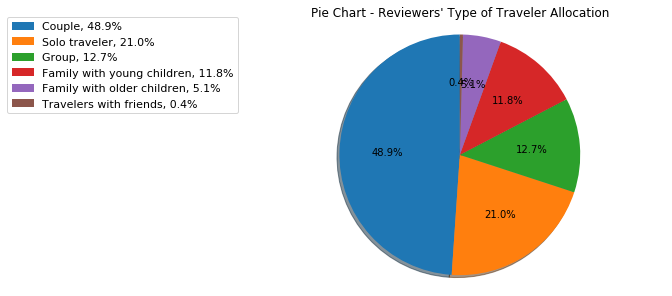

In [18]:
# Pie chart displaying Type of Traveler allocation

TravelCount = CombinedFinal['Types_of_Travler'].value_counts()
df1 = TravelCount.rename_axis('Type_of_Travler').reset_index(name='Total')

# Pie chart
labels = df1['Type_of_Travler']
sizes = df1['Total']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',shadow=True, startangle=90)

total=sum(sizes)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend(
    loc='best',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure)
plt.title("Pie Chart - Reviewers' Type of Traveler Allocation")
plt.show()

In this dataset, almost half travelers are couples, followed by solo traveler with approximately 21% of the population. Groups of travelers with friends in this dataset seems not willing to make further comments to the hotel they stayed.

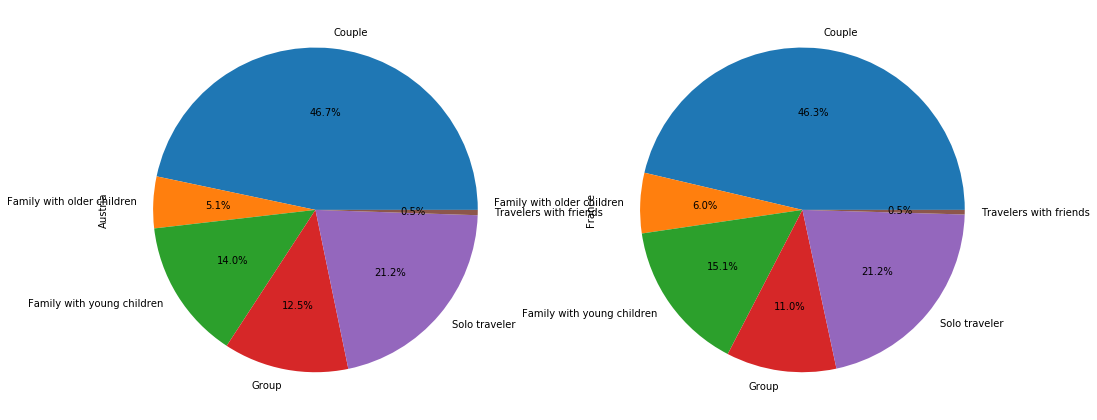

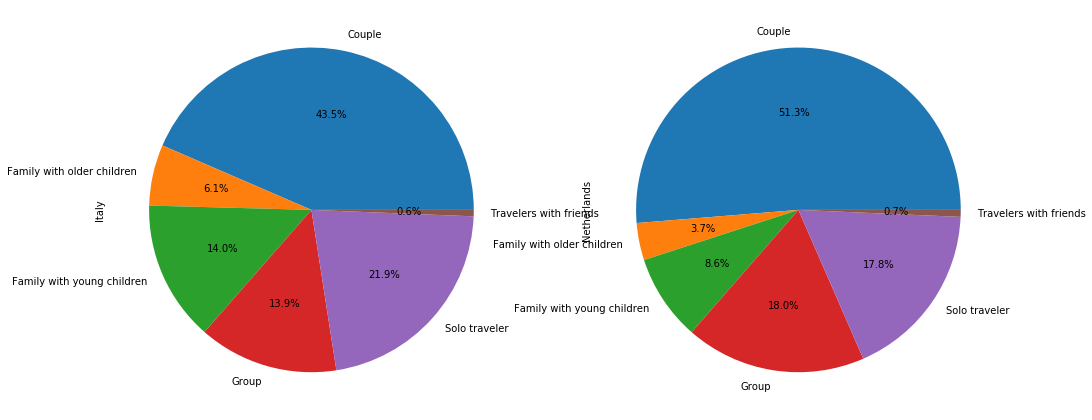

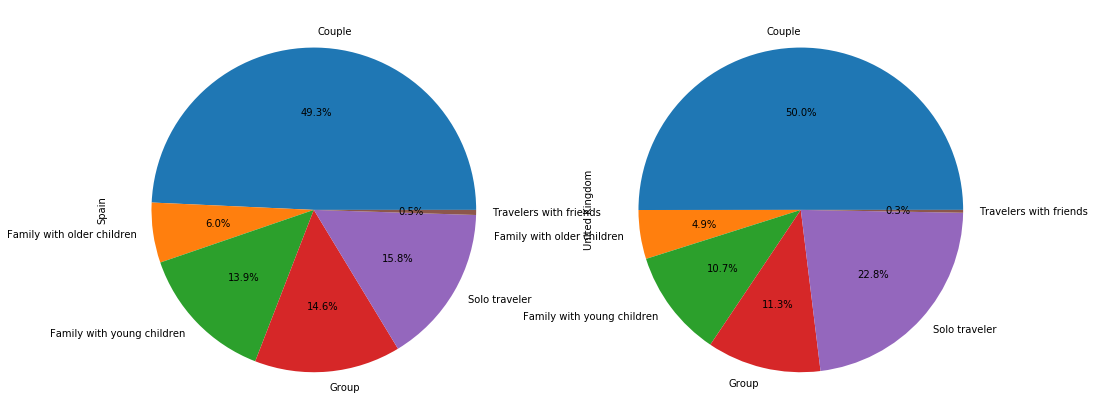

In [19]:
df1a=CombinedFinal.groupby(["Types_of_Travler", "Country"]).size().squeeze().unstack()

ax2=df1a.plot.pie(y=["Austria","France"], subplots=True,autopct='%1.1f%%',
                  figsize=(16,8),legend=False)

ax3=df1a.plot.pie(y=["Italy","Netherlands"], subplots=True, autopct='%1.1f%%',
                  figsize=(16,8),legend=False)


ax4=df1a.plot.pie(y=["Spain","United Kingdom"], subplots=True, autopct='%1.1f%%',
                  figsize=(16,8),legend=False)

plt.show()

Pie charts above display type of traveler by hotel located country. Diagram above aims to investigate if the structure of type of traveler in each country have significant different in allocation.

Overall the allocation in countries do not have significant differences, only Netherlands obtains more Group travelers than Solo traveler comparing to other location. The result seems to show that destination is not a factor of influencing the type of travelers.



In [20]:
import numpy as np

Text(0.5, 1.0, 'Reviewer Length of Stay Distribution')

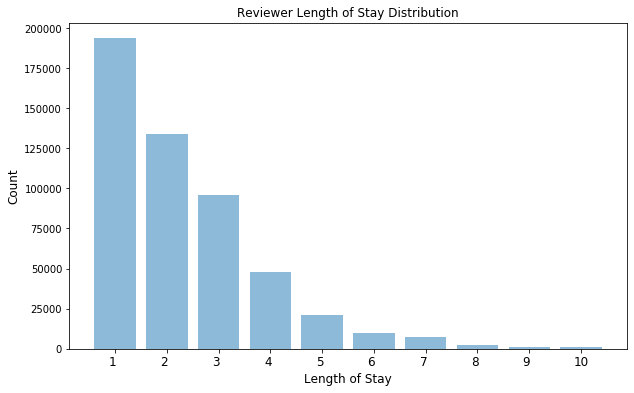

In [21]:
NightCount = CombinedFinal['Night'].value_counts()
df8 = NightCount.rename_axis('Length_of_Stay').reset_index(name='Counts').head(10)

objects = df8['Length_of_Stay']
y_pos = np.arange(len(objects))
performance = df8['Counts']

plt.figure(figsize=(10,6))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects,fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xlabel('Length of Stay',fontsize=12)
plt.title('Reviewer Length of Stay Distribution',fontsize=12)

It is logical that frequency in terms of Length of Stay is in descending behaviors, however, what would be the interval gap within the days? This bar chart help to investigate the level of difference. 

### Section 2 - Sentiment Analysis

As the data set contains big volume of positive and negative comments, it is vital important to perform sentiment analysis to get the overview of how reviewers think about the hotel in both positive and negative way.

World Cloud library is applied in this analysis. Word cloud is a visual representation of text data in the form of tags, which are typically single words whose importance is visualized by way of their size and color.


In [22]:
from wordcloud import WordCloud
from PIL import Image

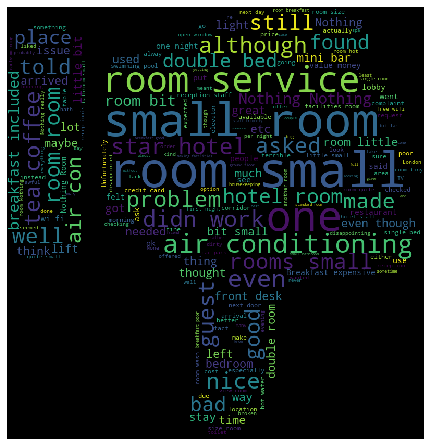

In [23]:
NegList = []

str_df=CombinedFinal[~CombinedFinal['Negative_Review'].str.upper().str.contains('NO NEGATIVE')].Negative_Review

for i in str_df:
    NegList.append(i)
NegCom = ' '.join(map(str,NegList))

Neg_mask = np.array(Image.open('thumb_down.png'))

Negcloud = WordCloud(background_color="black", mask = Neg_mask).generate(NegCom)

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(Negcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

Identify the feedback theme words for negative comments with shape thumb down. The most frequent aspect inspected by reviewers in negative comments is 'Size of Room'. There are several phrase expressing small size of room. It gives a hint to potential hotel developer that room size is an important factor to take into the consideration of gaining reputation. Air conditioning is another important factor for hotel staying.

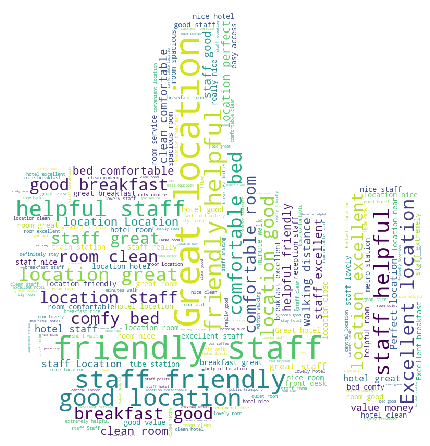

In [24]:
PosList = []

str_df=CombinedFinal[~CombinedFinal['Positive_Review'].str.upper().str.contains('NO POSITIVE')].Positive_Review

for i in str_df:
    PosList.append(i)
PosCom = ' '.join(map(str,PosList))

Pos_mask = np.array(Image.open('thumb_up.png'))

Poscloud = WordCloud(background_color="white", mask = Pos_mask).generate(PosCom)

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(Poscloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

Identify the feedback theme words for positive comments with shape thumb up. The most frequent aspect mentioned by reviewers in positive comments were service of staffs and location. Analysis here reflects that customers take service more in consideration rather than those facilities when determining the hotel is good or not. Once a hotel is built, location, facilities etc. cannot be changed / cannot be changed in short period, but providing good trainings to stuffs to offer better service is the quickest and easiest way to improve hotel scoring.

## Section 3 - Scoring Distrubtion

By applying another plotting library Seaborn, displaying the hotel average score distribution across the located country, the reviewers' score distribution by hotel located country and the type of traveler scoring behaviors in each country.

In [25]:
import seaborn as sns

Text(0.5, 1.0, 'Scatter Plot - Hotel Average Score Ditribution by Located Country')

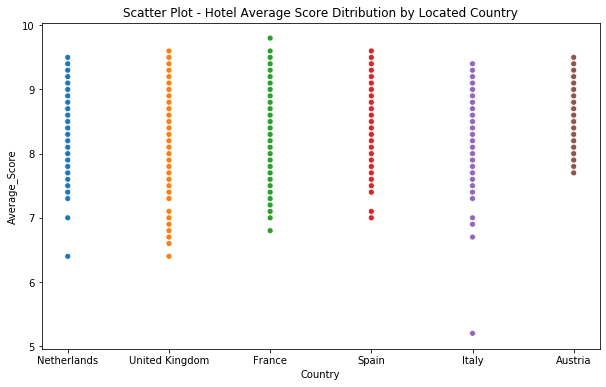

In [26]:
df2 = CombinedFinal.drop_duplicates(subset='Hotel_Name', keep="first")

plt.figure(figsize=(10,6), facecolor = None)
g =sns.scatterplot(x="Country", y="Average_Score",hue="Country",data=df2, legend=False);


plt.title('Scatter Plot - Hotel Average Score Ditribution by Located Country')

A scatter plot is a type of data displaying the relationship between two variables. Here we use a scatter plot to get the idea of the spread of each hotel average score in their country.  Smaller spread may refer the standard of hotels in that country are relatively aligned. France obtains the highest average score of the hotel comparing to other countries and Italy obtains the lowest. 

Text(0.5, 1.0, 'Boxplot - Hotel Reviewer Score Ditribution by Located Country')

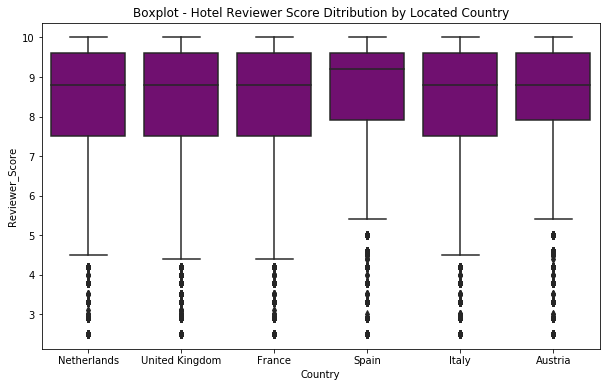

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=CombinedFinal,
    x='Country',
    y='Reviewer_Score',
    color='purple')

plt.title('Boxplot - Hotel Reviewer Score Ditribution by Located Country')

A boxplot is a standardized way of displaying the distribution of data based on a five-number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are.

The output shows that Spain obtains the highest median scoring. The interquartile range of Spain and Austria are relatively smaller than other countries, indicating that the hotel quality in those countries may not be as fluctuate as the others.

Multiple boxplot here to show how the scoring distribution of each type of traveler behave within the county, if they are similar or they would actually behave differently in how they scored to the hotels in same country.

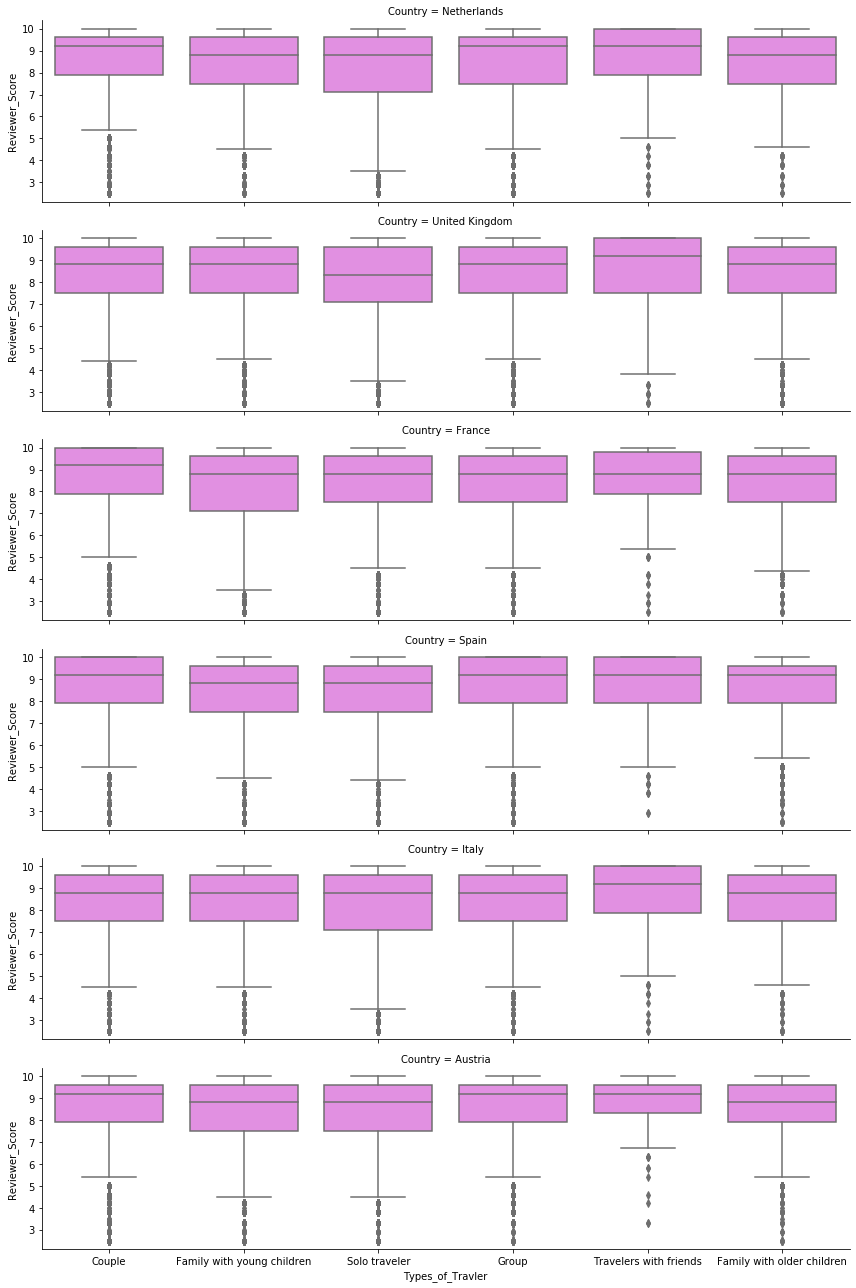

In [28]:
sns.catplot(
    data=CombinedFinal,
    x='Types_of_Travler',
    y='Reviewer_Score',
    row='Country',
    kind='box',
    height=3, 
    aspect=4,
    color='violet')

Multiple boxplots of type of traveler by each country help to identify if scoring distibution on each type of traveler behave significantly in the country and if they have similar median scroing.

### Section 4 - Correlation Analysis

This section is trying to use a statistical model to identify if the mean score of reviewer with different nationality score differently without coincident. Significant results indicating that mean score of reviewers with different nationality score different. Statmodels is applied to ANOVA analysis.

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [30]:
mod =ols ('Reviewer_Score ~ Reviewer_Nationality', data=df).fit()
aov_table=sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                            sum_sq        df          F  PR(>F)
Reviewer_Nationality  2.684588e+04     226.0  45.137479     0.0
Residual              1.356656e+06  515511.0        NaN     NaN


The one-way analysis of variance (ANOVA) is used to determine whether there are anystatistically significant differences between the means of two or more independent(unrelated) groups (although you tend to only see it used when there are a minimum ofthree, rather than two groups). 

The current model explains a significant amount of variance, F(226,512243) = 44.7210, p=0.00(<0.05). We can conclude that the nationality of reviewers rated the scores of hotels are significantly difference in between. 

With the confirmation of the p-value, we perform the table below to provide information on average score to each country by top Nationalities. As the data involves many different nationalities, we only select the top 10 with most review for result.



In [31]:
df5=CombinedFinal.groupby(["Reviewer_Nationality"]).Reviewer_Score.agg(['count','mean'])

df6=df5.sort_values(by = 'count', ascending = False).head(10)

df6a=df6['mean']

df6b=pd.DataFrame(df6a)

df6c=df6b.rename(columns={"mean": "Overall"})

df6c

,Overall
Reviewer_Nationality,
United Kingdom,8.486352
United States of America,8.786999
Australia,8.591718
Ireland,8.464052
United Arab Emirates,7.878828
Saudi Arabia,7.881767
Netherlands,8.125148
Switzerland,8.161593
Germany,8.132477


In [32]:
df7=CombinedFinal.groupby(["Reviewer_Nationality", "Country"]).Reviewer_Score.agg(['mean']).squeeze().unstack()

TopTenNat=df6.index.values.tolist()

TopTenResult= df7.loc[df7.index.isin(TopTenNat)]

TopTenResult.reindex(TopTenNat)

df7.head()

Country,Austria,France,Italy,Netherlands,Spain,United Kingdom
Reviewer_Nationality,,,,,,
,8.057576,8.209677,8.272727,8.350725,8.214035,7.771318
Abkhazia Georgia,8.438462,7.865000,9.050000,8.543478,8.472000,8.312121
Afghanistan,6.300000,5.800000,NaN,8.300000,7.100000,6.650000
Albania,8.328000,7.846429,8.376471,8.088462,8.246667,8.229412
Algeria,8.633333,7.618519,7.933333,7.411111,7.859375,7.850000


In [33]:
TopTenFinal = pd.merge(df6c,TopTenResult, on='Reviewer_Nationality')

#return 2 decimal places
TopTenFinal.round(2)

,Overall,Austria,France,Italy,Netherlands,Spain,United Kingdom
Reviewer_Nationality,,,,,,,
United Kingdom,8.49,8.81,8.56,8.45,8.58,8.72,8.42
United States of America,8.79,8.95,8.83,8.81,8.87,8.92,8.60
Australia,8.59,8.78,8.69,8.78,8.64,8.79,8.37
Ireland,8.46,8.74,8.67,8.58,8.50,8.63,8.32
United Arab Emirates,7.88,7.96,7.79,8.00,7.99,8.12,7.74
Saudi Arabia,7.88,8.11,7.82,8.00,8.03,8.08,7.72
Netherlands,8.13,8.33,8.22,8.00,8.13,8.27,7.97
Switzerland,8.16,8.35,8.26,8.19,8.15,8.23,8.03
Germany,8.13,8.36,8.23,8.00,8.15,8.21,7.99


As the ANOVA test indicates that reviewers from different country would score differently, we select top 10 nationalities with most comments to display their average scoring on overall Europe market (the dataset) and to different countries. Visitors from Europe are more active providing comments in this dataset, probably because of the location advantage to visit European countries. Visitors from Middle East countries obtain lower scoring to hotels comparing to other nationalities.

### Section 5 - Recommendation

In this section, we would like to provide the top 5 hotels of 6 Europe countries to visitors, as a reference of decision making. The table is based on the average score of the hotel and the counts of scoring they have received, by providing the name list (with address) to the viewers.

In [34]:
HotelCount = CombinedFinal['Hotel_Name'].value_counts()
df3 = HotelCount.rename_axis('Hotel_Name').reset_index(name='counts')
df3.head()

,Hotel_Name,counts
0,Britannia International Hotel Canary Wharf,4789
1,Strand Palace Hotel,4256
2,Park Plaza Westminster Bridge London,4169
3,Copthorne Tara Hotel London Kensington,3578
4,DoubleTree by Hilton Hotel London Tower of London,3212


In [35]:
df4=pd.DataFrame(df2)
df4=df4[['Country','Hotel_Name','Hotel_Address','Additional_Number_of_Scoring','Average_Score']]

df4.head()

,Country,Hotel_Name,Hotel_Address,Additional_Number_of_Scoring,Average_Score
0,Netherlands,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7
405,United Kingdom,K K Hotel George,1 15 Templeton Place Earl s Court Kensington a...,244,8.5
971,United Kingdom,Apex Temple Court Hotel,1 2 Serjeant s Inn Fleet Street City of London...,639,9.2
2008,United Kingdom,The Park Grand London Paddington,1 3 Queens Garden Westminster Borough London W...,1058,7.7
3778,France,Monhotel Lounge SPA,1 3 Rue d Argentine 16th arr 75116 Paris France,26,8.4


In [36]:
TopFive = pd.merge(df3,df4, on='Hotel_Name')
TopFive= TopFive.drop_duplicates(subset='Hotel_Name', keep="first")

df_TopFive=pd.DataFrame(TopFive)

df_TopFive['Total_Number_of_Score_Receive']=df_TopFive.counts+df_TopFive.Additional_Number_of_Scoring


df_TopFive2=df_TopFive.sort_values(['Country','Average_Score', 'Total_Number_of_Score_Receive'], 
                       ascending=[True, False, False] ).groupby('Country').head(5)


df_TopFiveFinal=df_TopFive2[['Country','Hotel_Name','Hotel_Address','Average_Score']]

df_TopFiveFinal

,Country,Hotel_Name,Hotel_Address,Average_Score
947,Austria,Hotel Sacher Wien,Philharmoniker Stra e 4 01 Innere Stadt 1010 V...,9.5
1470,Austria,Palais Coburg Residenz,Coburgbastei 4 01 Innere Stadt 1010 Vienna Aus...,9.5
478,Austria,Best Western Premier Kaiserhof Wien,Frankenberggasse 10 04 Wieden 1040 Vienna Austria,9.4
536,Austria,The Guesthouse Vienna,F hrichgasse 10 01 Innere Stadt 1010 Vienna Au...,9.4
644,Austria,Hotel Sans Souci Wien,Burggasse 2 07 Neubau 1070 Vienna Austria,9.4
1425,France,Ritz Paris,15 Place Vend me 1st arr 75001 Paris France,9.8
1288,France,H tel de La Tamise Esprit de France,4 rue d Alger 1st arr 75001 Paris France,9.6
1298,France,Hotel The Peninsula Paris,19 avenue Kleber 16th arr 75116 Paris France,9.5
1307,France,Le Narcisse Blanc Spa,19 Boulevard De La Tour Maubourg 7th arr 75007...,9.5
533,France,H tel D Aubusson,33 Rue Dauphine 6th arr 75006 Paris France,9.4


In [37]:
#Rename index as ranking per country

a=df_TopFiveFinal.reset_index()

b=list(a.index.values)

c=[]

for i in b:
    d=(i%5)+1
    c.append(d)
    
df_Top5Final=df_TopFiveFinal.copy()

df_Top5Final['Ranking_per_Country']=c

blankIndex=['']*len(df_Top5Final)
df_Top5Final.index=blankIndex

df_Top5Final.set_index('Ranking_per_Country',inplace=True)

df_Top5Final

,Country,Hotel_Name,Hotel_Address,Average_Score
Ranking_per_Country,,,,
1,Austria,Hotel Sacher Wien,Philharmoniker Stra e 4 01 Innere Stadt 1010 V...,9.5
2,Austria,Palais Coburg Residenz,Coburgbastei 4 01 Innere Stadt 1010 Vienna Aus...,9.5
3,Austria,Best Western Premier Kaiserhof Wien,Frankenberggasse 10 04 Wieden 1040 Vienna Austria,9.4
4,Austria,The Guesthouse Vienna,F hrichgasse 10 01 Innere Stadt 1010 Vienna Au...,9.4
5,Austria,Hotel Sans Souci Wien,Burggasse 2 07 Neubau 1070 Vienna Austria,9.4
1,France,Ritz Paris,15 Place Vend me 1st arr 75001 Paris France,9.8
2,France,H tel de La Tamise Esprit de France,4 rue d Alger 1st arr 75001 Paris France,9.6
3,France,Hotel The Peninsula Paris,19 avenue Kleber 16th arr 75116 Paris France,9.5
4,France,Le Narcisse Blanc Spa,19 Boulevard De La Tour Maubourg 7th arr 75007...,9.5


## Conclusion

This dataset only contains the hotels review in European countries. Dataset author Jason has mentioned in Kaggle description that those data were directly scraped from booking.com. Therefore, there are two potentials studies we propose can do based on this project. 
1.	In a Macao Resident perspective
We can scrape the destination we are interested in. For example, Asian countries like Japan, Korea, Thailand. Those countries are popular to locals due to the advantage of the location. As a traveller, it is important to quickly catch the summary of the hotels to help them with decision making. 

2.	In a Macao hotel entrepreneur perspective
According to the latest figure released by Macau Statistics and Census service, the hotel industry includes 121 hotel establishments. By scarpering Macao hotels data through booking platform, it can not only conduct the statistical comparison to other hotels, but also the sentiment analysis could help them gaining insight from reviews about their own hotels and the competitors, so that to help them with the future strategic planning.